# Exercizes on clustering

Here you can find a program to read a data file in csv format. 

The data file has the following heading:
    number of samples, number of features
    list of the names of the features (separated by comma)
    
The remaining lines contain an example per row.
For each row there is a list of real numbers (commas separated) which are the feature values.   

In [20]:
import csv
from os.path import join
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import pdist, squareform

In [21]:
# this function reads the data file, loads the configuration attributes specifiefd in the heading
# (numer of examples and features), the list of feature names
# and loads the data in a matrix named data    
def load_data(file_path, file_name):
   with open(join(file_path, file_name)) as csv_file:
       data_file = csv.reader(csv_file,delimiter=',')
       temp1 = next(data_file)
       n_samples = int(temp1[0])
       print("n_samples =", n_samples)
       n_features = int(temp1[1])
       temp2 = next(data_file)
       feature_names = np.array(temp2[:n_features])

       data_list = [it for it in data_file]
       data = np.asarray(data_list, dtype=np.float64)                  
   return data,feature_names,n_samples,n_features

In [22]:
# The main program reads the input file containing the dataset file_path is the file path where the file with the data to be read are located 
# we assume the file contains an example per line each example is a list of real values separated by a comma (csv format).
# The first line of the file contains the heading with: N_samples,n_features, the second line contains the feature names separated by a comma     
file_path="./sample_data/"
# all the three datasets contain data points on (x,y) 
file_name1="3-clusters.csv"
file_name2="dataset-DBSCAN.csv"     
file_name3="CURE-complete.csv"    
data1,feature_names1,n_samples1,n_features1 = load_data(file_path, file_name1)
data2,feature_names2,n_samples2,n_features2 = load_data(file_path, file_name2)
data3,feature_names3,n_samples3,n_features3 = load_data(file_path, file_name3)
print("dataset n. 1: n samples:", n_samples1 ,", n features:", n_features1)
print("dataset n. 2: n samples:", n_samples2 ,", n features:", n_features2)
print("dataset n. 3: n samples:", n_samples3 ,", n features:", n_features3)

n_samples = 150
n_samples = 6118
n_samples = 86558
dataset n. 1: n samples: 150 , n features: 2
dataset n. 2: n samples: 6118 , n features: 2
dataset n. 3: n samples: 86558 , n features: 2


The following program plots the dataset n.1

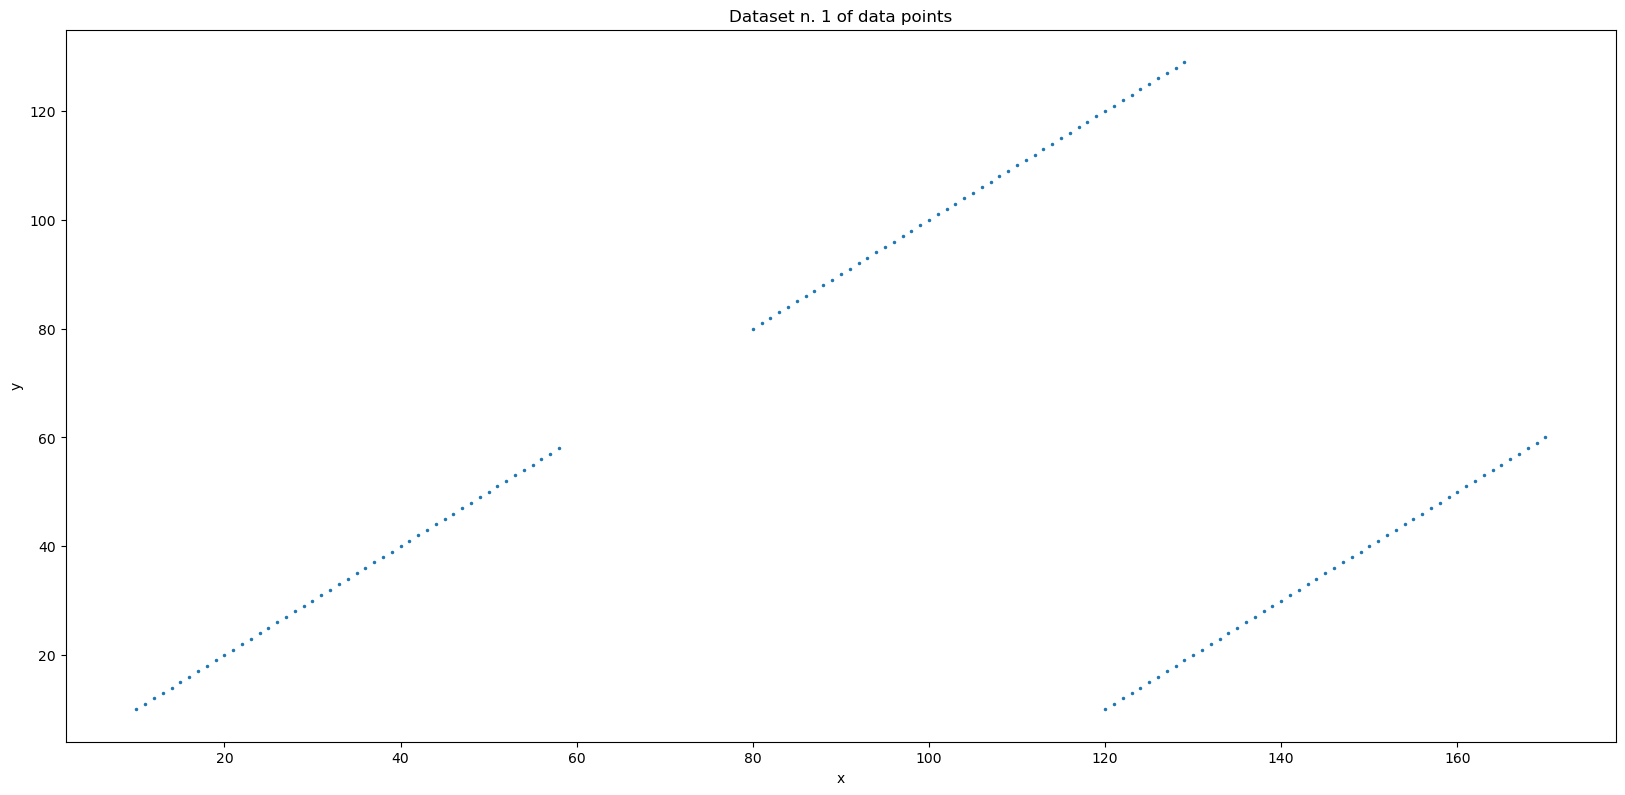

In [23]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 1 of data points')
ax.set_xlabel(feature_names1[0])
ax.set_ylabel(feature_names1[1])

#plot the dataset
plt.plot(data1[:,0], data1[:,1], '.',markersize=3)
plt.show()

The following is the program for plotting the dataset n.2

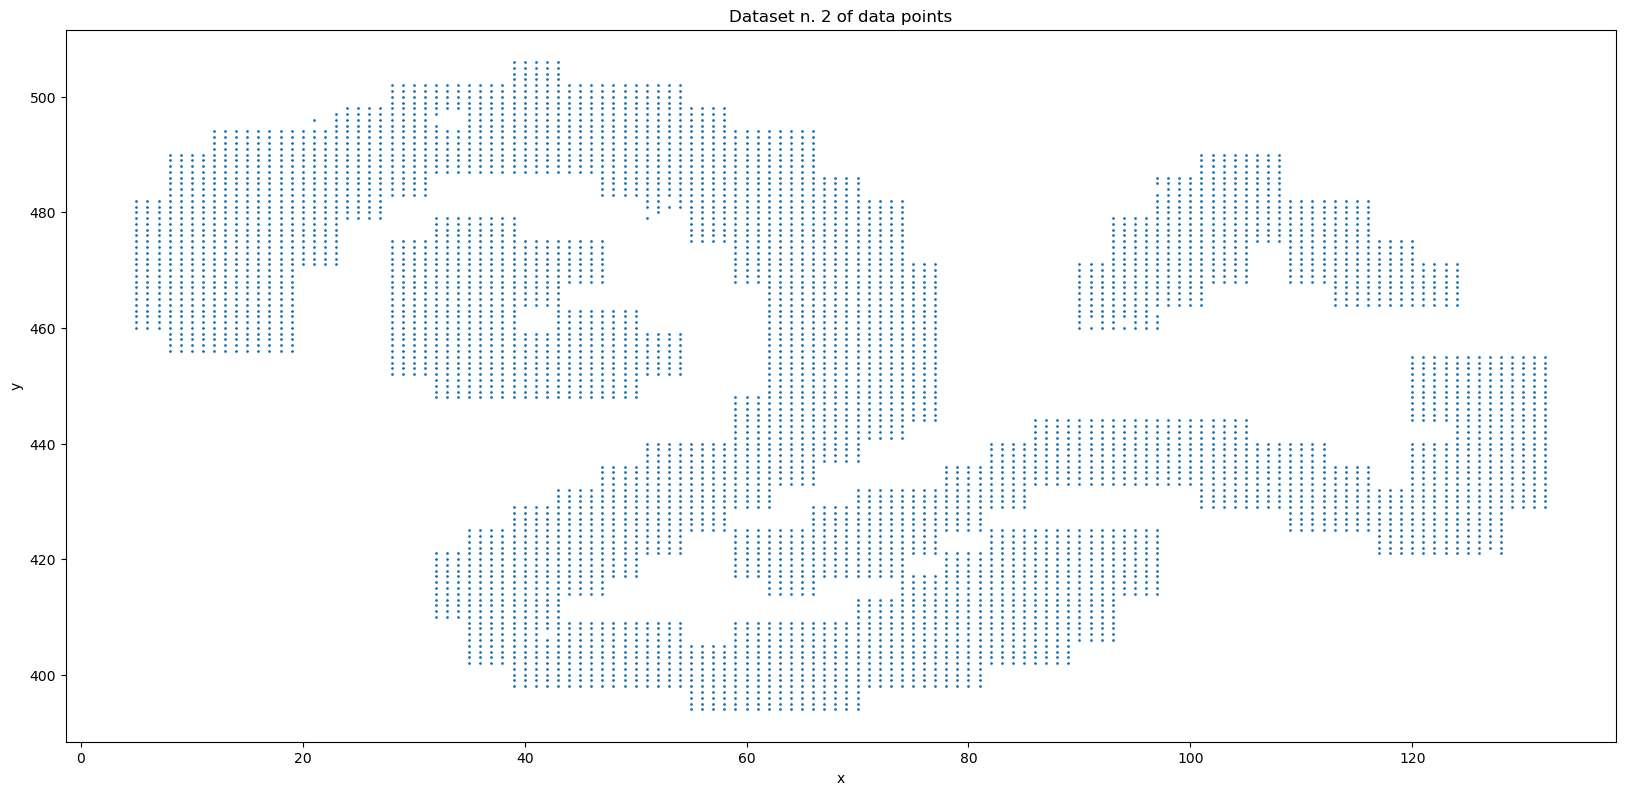

In [24]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 2 of data points')
ax.set_xlabel(feature_names2[0])
ax.set_ylabel(feature_names2[1])

#plot the dataset
plt.plot(data2[:,0], data2[:,1], '.', markersize=2)
plt.show()

The following is the program for plotting the dataset n.3

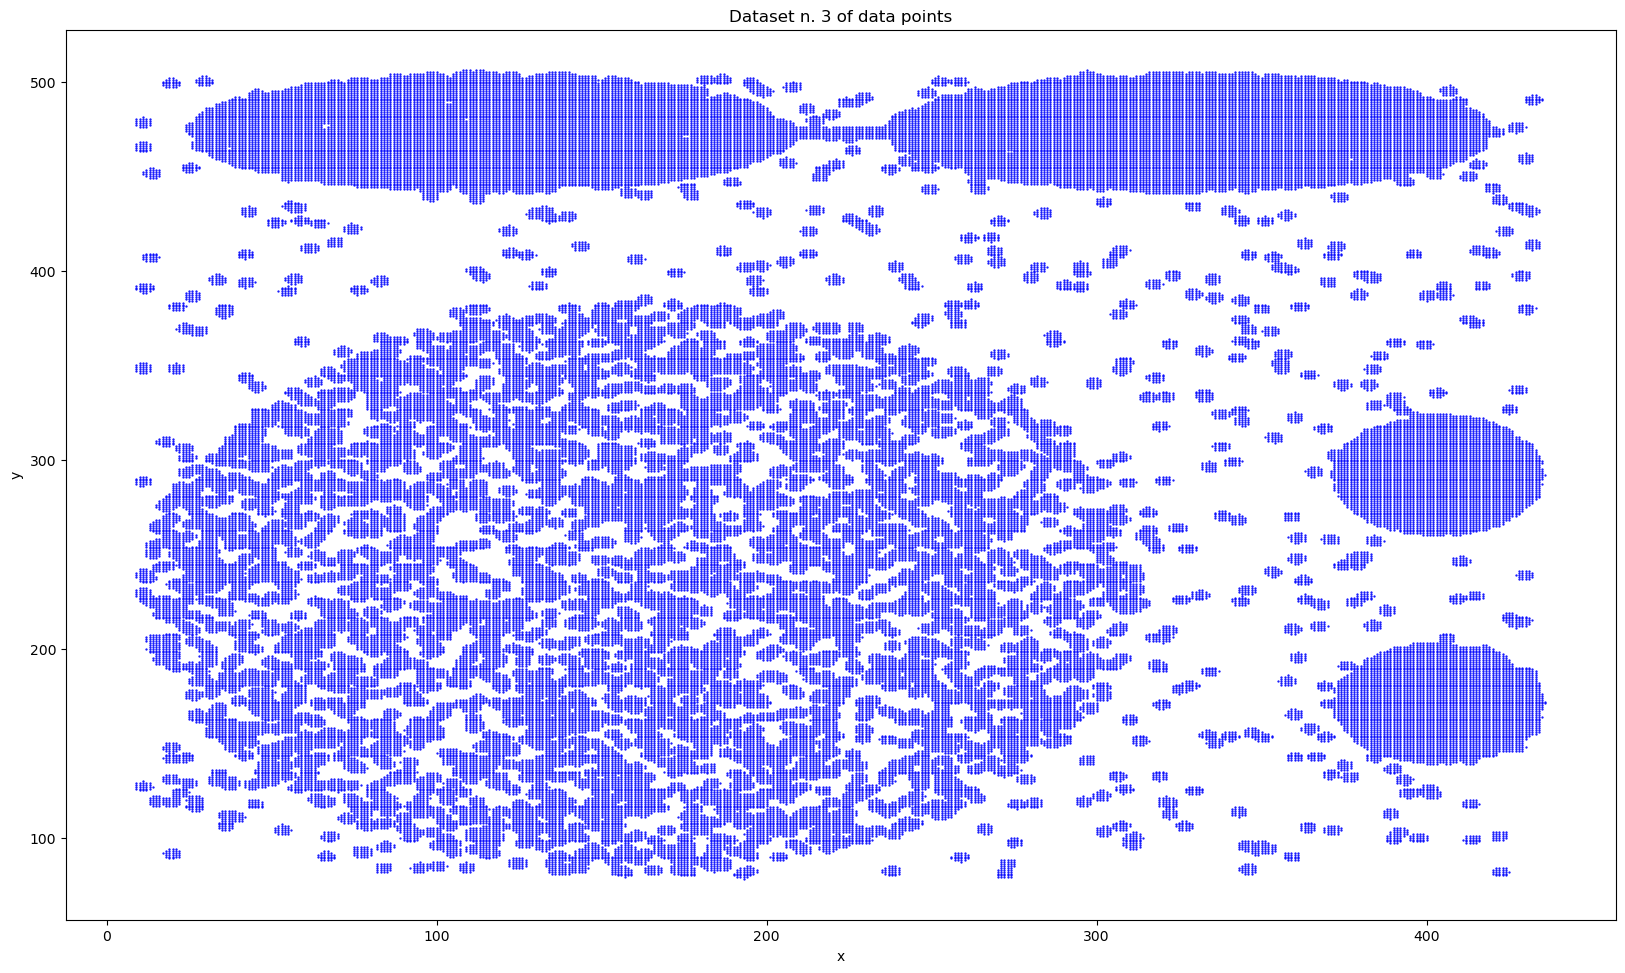

In [25]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 3 of data points')
ax.set_xlabel(feature_names3[0])
ax.set_ylabel(feature_names3[1])

#plot the dataset
plt.plot(data3[:,0], data3[:,1], '.', markersize=1.2, markeredgecolor = 'blue')
plt.show()

## In the following program we cluster the dataset n.1 with K-means. 
From the plot of dataset n.1 we see 3 separated clusters. Thus k=3. 

In [26]:
data1,feature_names1,n_samples1,n_features1 = load_data(file_path, file_name1)
np.random.seed(5)
k=3
kmeans1 = KMeans(n_clusters=k, random_state=0, n_init='auto').fit(data1)

i = 0
for i in range(n_samples1):
    print("Example n."+str(i)+"=("+str(data1[i,0])+","+str(data1[i,1])+") in cluster n."+str(kmeans1.labels_[i]))

n_samples = 150
Example n.0=(10.0,10.0) in cluster n.1
Example n.1=(11.0,11.0) in cluster n.1
Example n.2=(12.0,12.0) in cluster n.1
Example n.3=(13.0,13.0) in cluster n.1
Example n.4=(14.0,14.0) in cluster n.1
Example n.5=(15.0,15.0) in cluster n.1
Example n.6=(16.0,16.0) in cluster n.1
Example n.7=(17.0,17.0) in cluster n.1
Example n.8=(18.0,18.0) in cluster n.1
Example n.9=(19.0,19.0) in cluster n.1
Example n.10=(20.0,20.0) in cluster n.1
Example n.11=(21.0,21.0) in cluster n.1
Example n.12=(22.0,22.0) in cluster n.1
Example n.13=(23.0,23.0) in cluster n.1
Example n.14=(24.0,24.0) in cluster n.1
Example n.15=(25.0,25.0) in cluster n.1
Example n.16=(26.0,26.0) in cluster n.1
Example n.17=(27.0,27.0) in cluster n.1
Example n.18=(28.0,28.0) in cluster n.1
Example n.19=(29.0,29.0) in cluster n.1
Example n.20=(30.0,30.0) in cluster n.1
Example n.21=(31.0,31.0) in cluster n.1
Example n.22=(32.0,32.0) in cluster n.1
Example n.23=(33.0,33.0) in cluster n.1
Example n.24=(34.0,34.0) in cluste

In the following program we plot the clusters

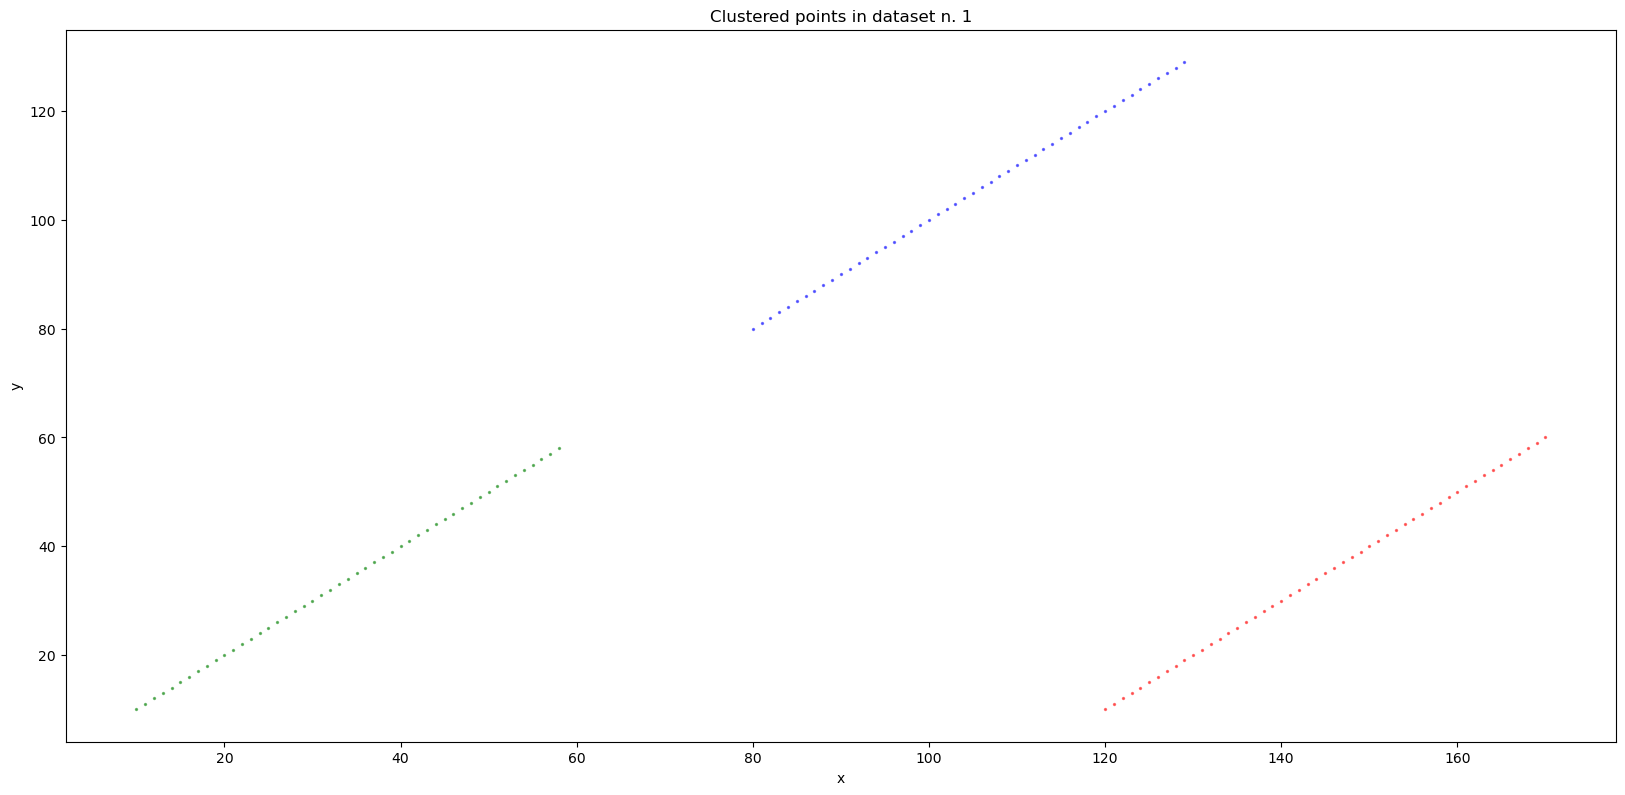

In [27]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Clustered points in dataset n. 1')
ax.set_xlabel('x')
ax.set_ylabel('y')

# set the list of colors to be selected when plotting the different clusters
color=['b','g','r','c','m','y','k','w']
    
#plot the dataset
for clu in range(k):
    # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
    data_list_x = [data1[i,0] for i in range(n_samples1) if kmeans1.labels_[i]==clu]
    data_list_y = [data1[i,1] for i in range(n_samples1) if kmeans1.labels_[i]==clu]
    plt.scatter(data_list_x, data_list_y, s=2, edgecolors='face', c=color[clu], alpha=0.5)
    
plt.show()

In [28]:
def kmeans_plot_cluster(data, min_k, max_k, n_rows, n_cols, figsize, title):
    if n_rows * n_cols < (max_k+1) - min_k:
        raise Exception('Table not large enough')
    
    fig, axs = plt.subplots(n_rows, n_cols, figsize=figsize, squeeze=False)
    for l in range(min_k, max_k+1):
        r = (l - min_k) // n_cols
        c = (l - min_k) % n_cols
        # Performing kmeans on data
        kmeans = KMeans(n_clusters=l, random_state=0, n_init='auto').fit(data)
        # Plotting the clusters
        axs[r, c].set(xlabel = 'Feature space for the 1st feature', ylabel = 'Feature space for the 2nd feature', title = 'k = %d' % l)
        axs[r, c].scatter(data[:,0], data[:,1], c=kmeans.labels_, edgecolors='face', s=2)
        # Labeling the clusters
        centers = kmeans.cluster_centers_
        axs[r, c].scatter(centers[:, 0], centers[:, 1], marker="o", c="white", s=200, edgecolor="k")
        [axs[r, c].scatter(center[0], center[1], marker="$%d$" % t, alpha=1, s=50, edgecolor="k") for t, center in enumerate(centers)]

    plt.suptitle(title, fontsize='x-large')
    plt.show()

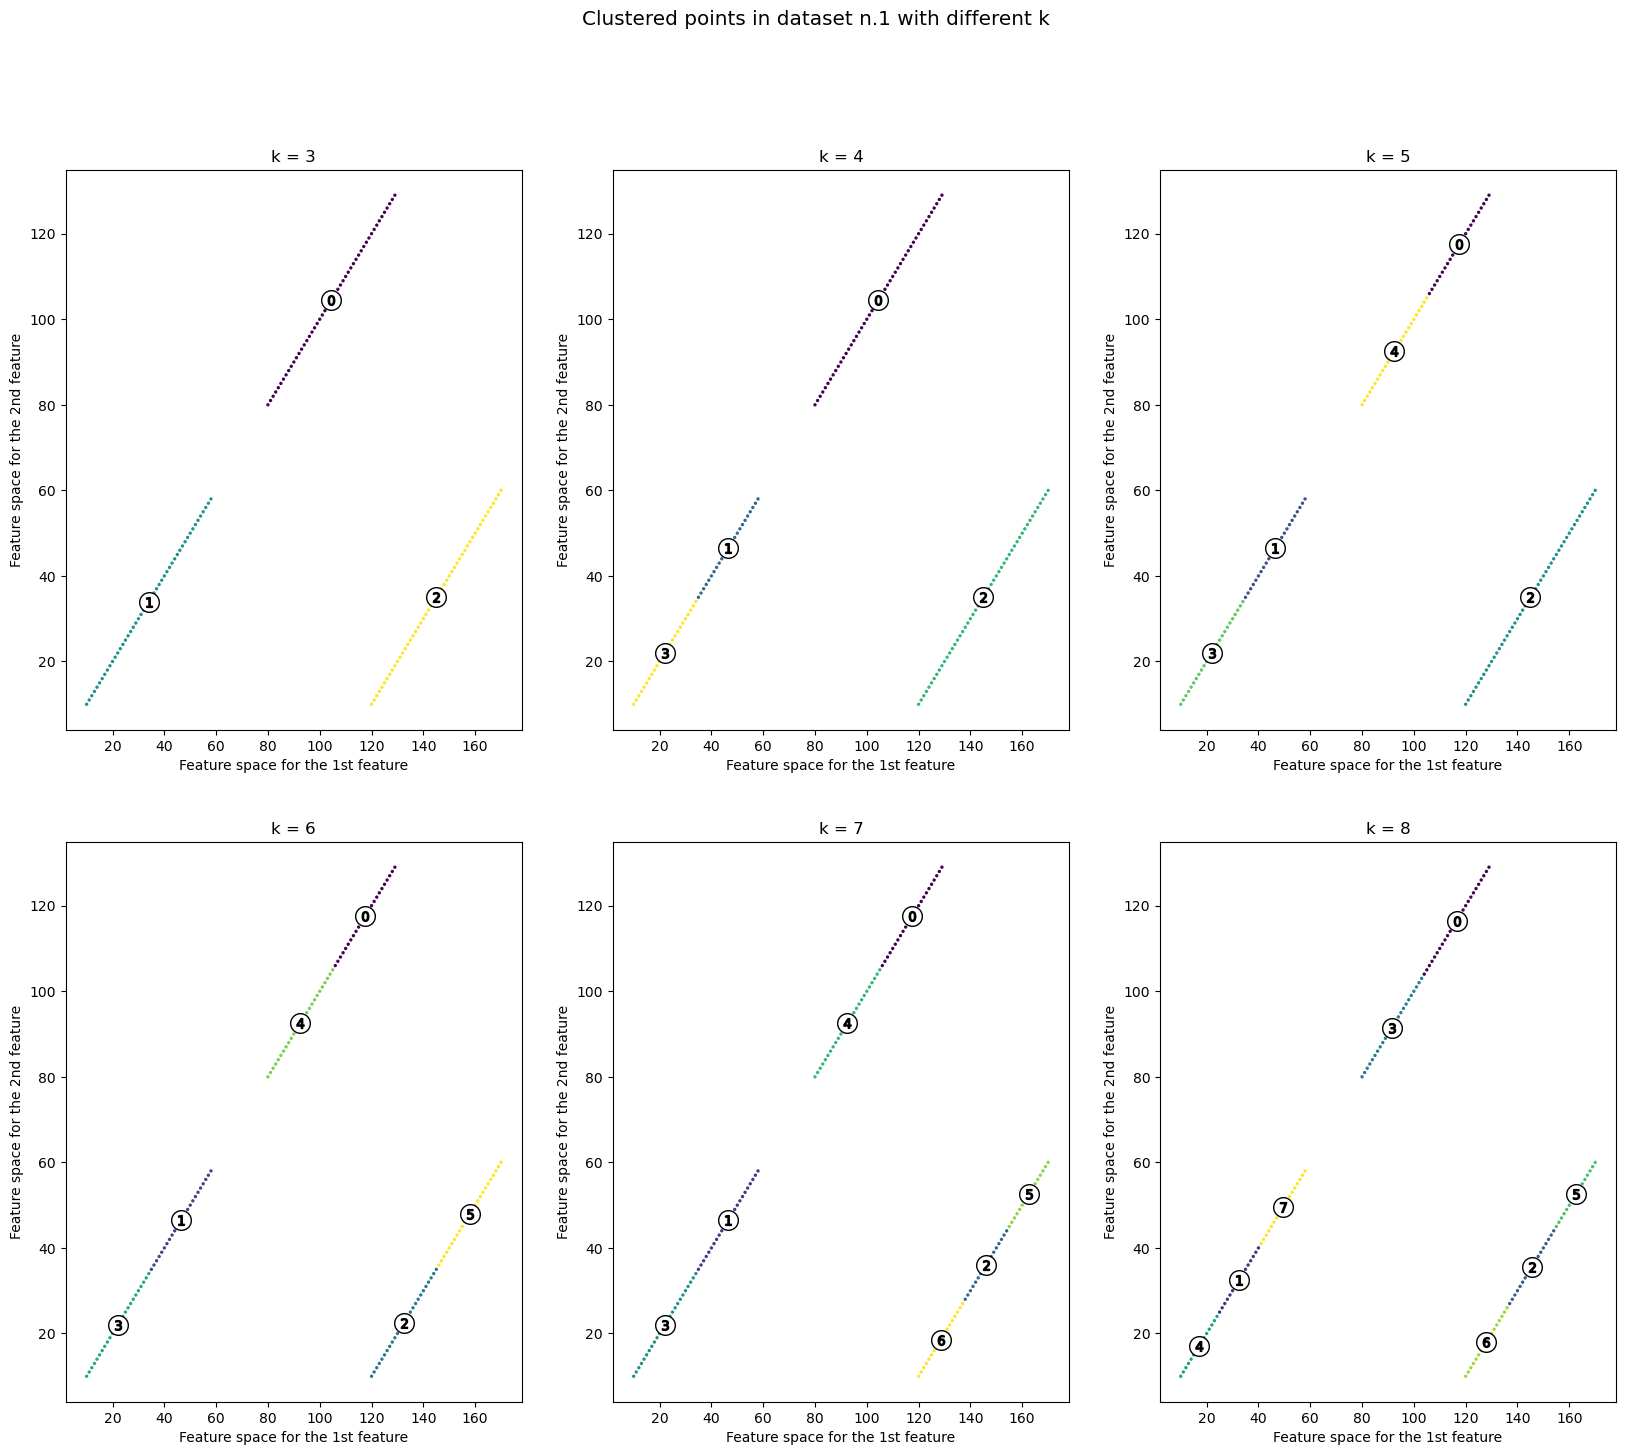

In [29]:
kmeans_plot_cluster(data1, min_k=3, max_k=8, n_rows=2, n_cols=3, figsize=(20,16), title='Clustered points in dataset n.1 with different k')

In the following cell I propose you to perform clustering with K-means on dataset2 and you have to plot clustering results on dataset2.

**Answer:** 
how do you explain what it happens?

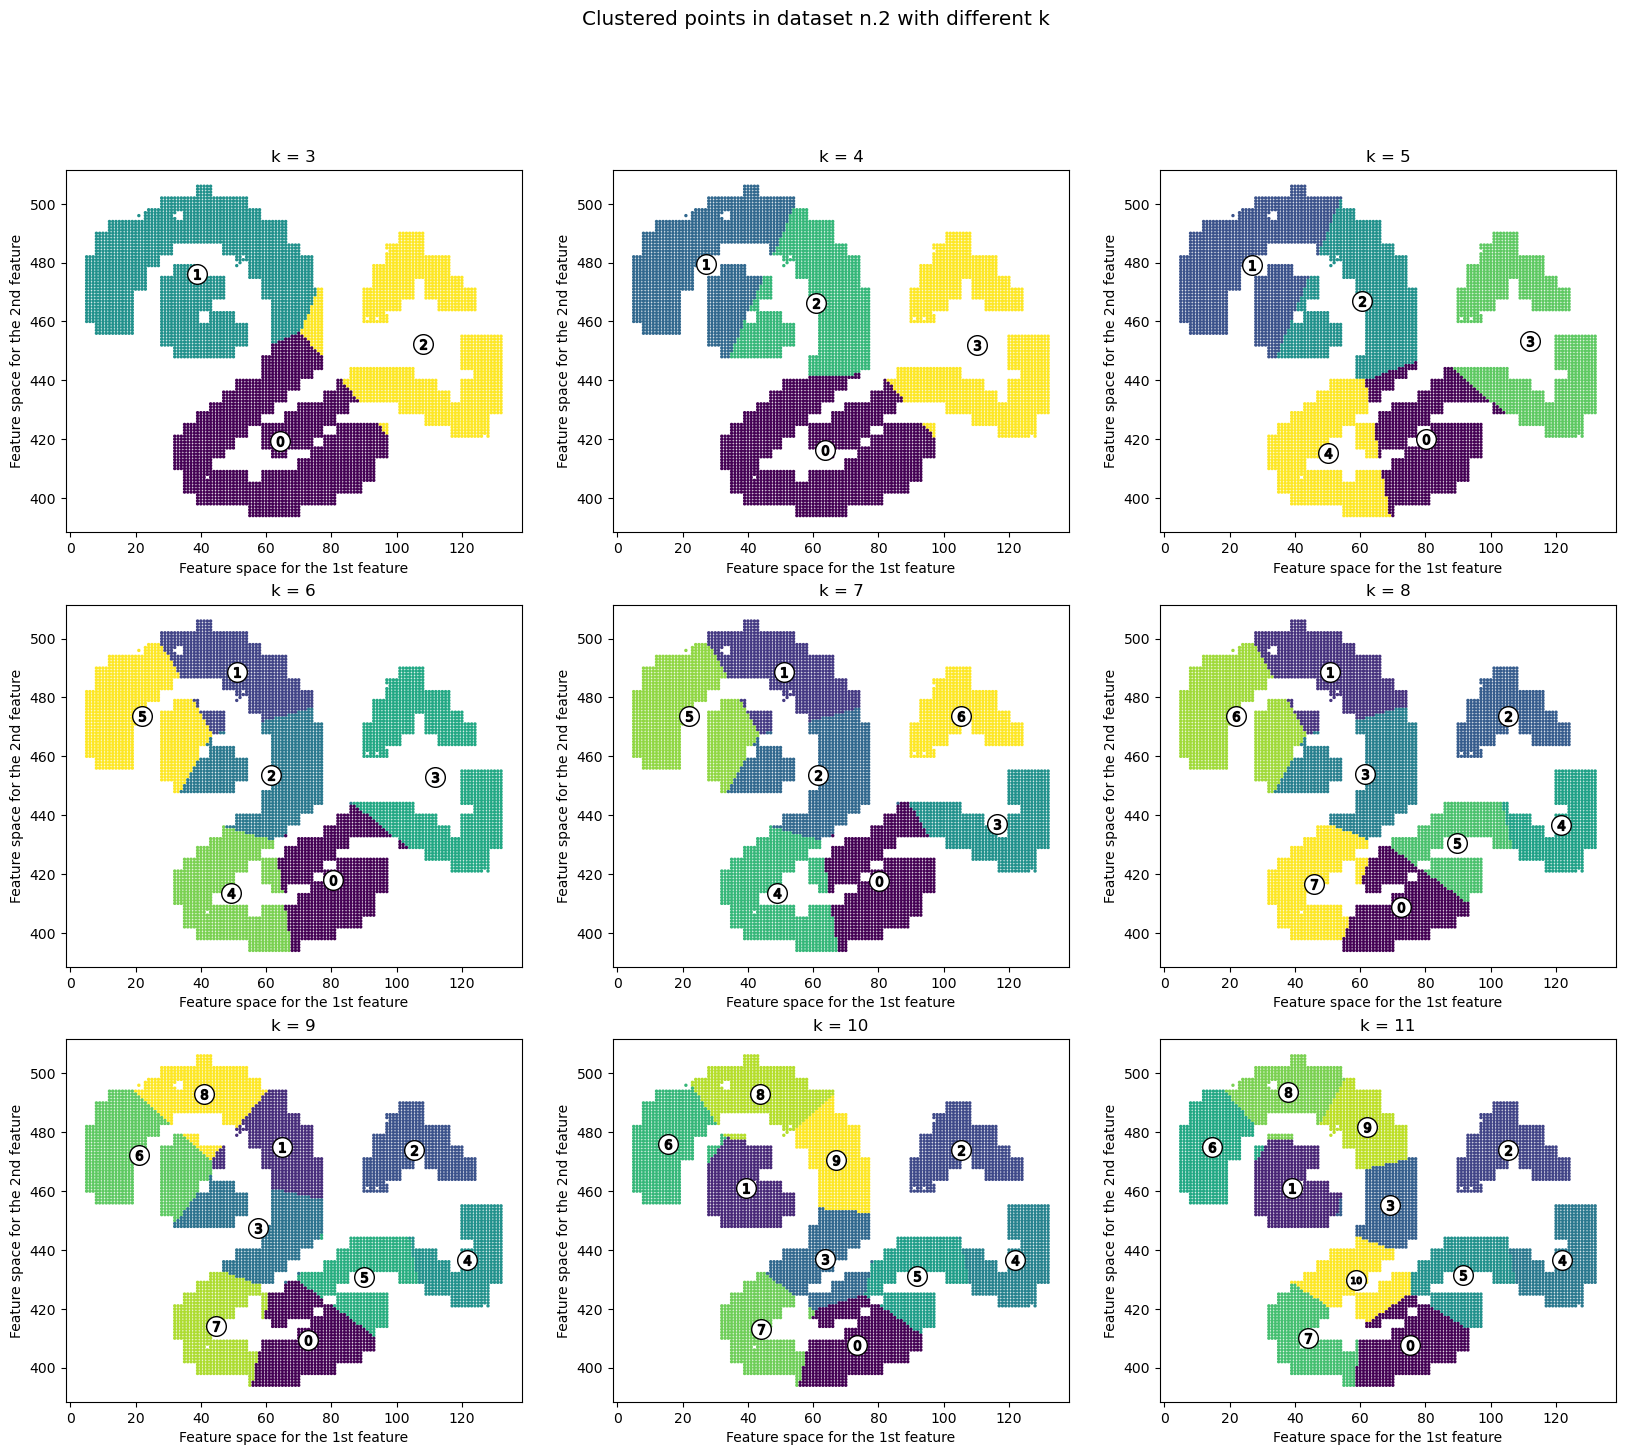

In [30]:
kmeans_plot_cluster(data2, min_k=3, max_k=11, n_rows=3, n_cols=3, figsize=(20,16), title='Clustered points in dataset n.2 with different k')

In the following cell, I propose you to perform clustering with K-means on the dataset3 and to plot clustering results.

**Answer:** 
how do you explain what it happens?

In [31]:
sample_fact = 0.2
data3_r = resample(data3, n_samples=int(len(data3) * sample_fact))
#plt.figure(figsize=(20, 10))
#plt.plot(data3_r[:,0], data3_r[:,1], '.', markersize=1.2, markeredgecolor = 'blue')

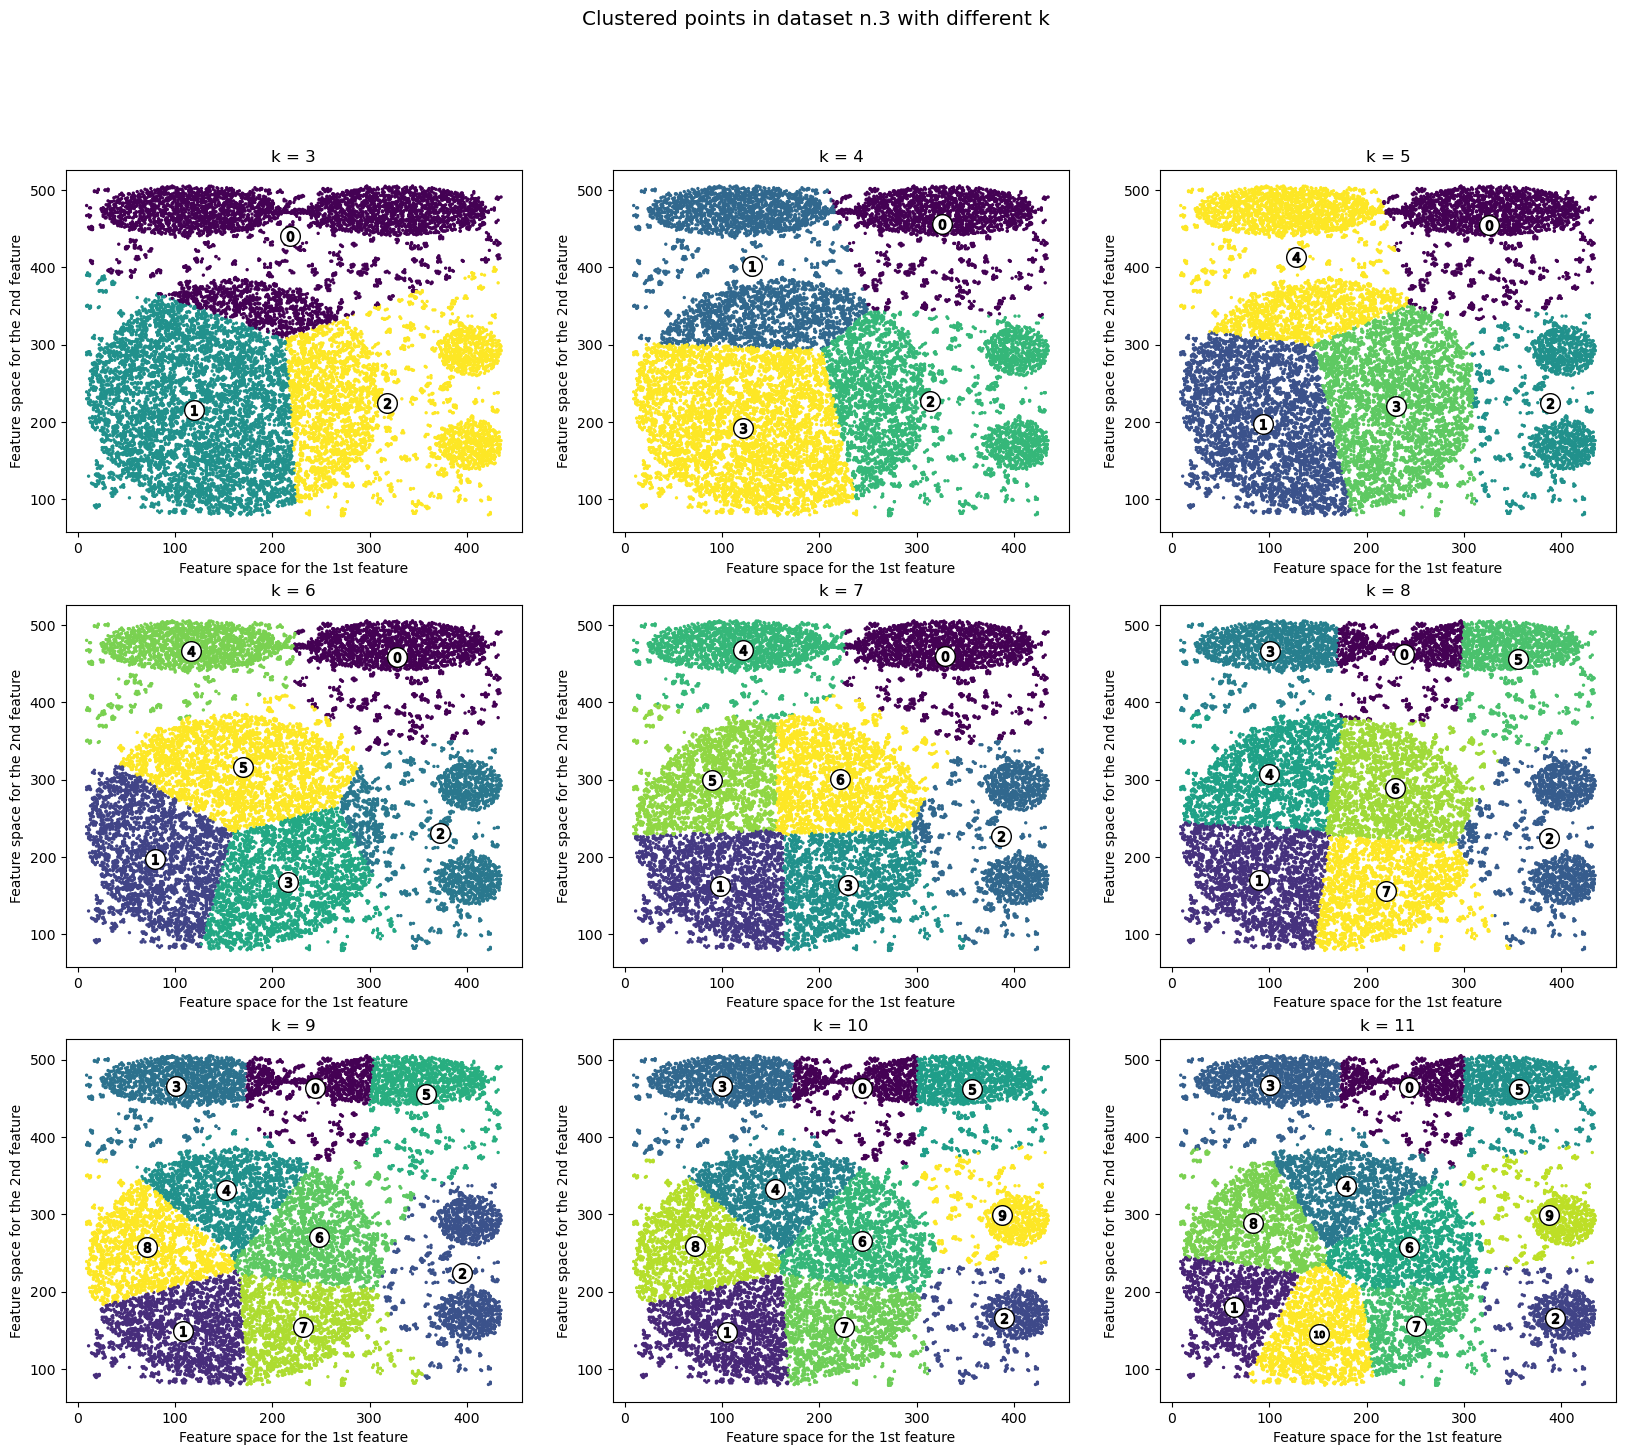

In [32]:
kmeans_plot_cluster(data3_r, min_k=3, max_k=11, n_rows=3, n_cols=3, figsize=(20,16), title='Clustered points in dataset n.3 with different k')

In the following cells I propose you to write a program that computes with a statistical measure of your choice a quantitative evaluation of clusters in the three datasets.

**Note:**
It is advisable to execute K-means a certain number of times (let us try 10 times) and then select the clustering solution that gives the best value of the evaluation measure.

In [33]:
def silhouettes(data, min_k=2, max_k=10, it=5):
    sils = []
    random_inits_sils = []

    for l in range(min_k, max_k + 1):
        for _ in range(it):
            random_inits_sils = []
            kmeans = KMeans(n_clusters=l, init='random', n_init='auto').fit(data)
            sil = metrics.silhouette_score(data, kmeans.labels_, metric='euclidean')
            random_inits_sils.append(sil)
        sils.append(max(random_inits_sils))

    return sils, sils.index(max(sils)) + min_k

In [34]:
min_k = 2
max_k = 10
silhouettes1, best_k1 = silhouettes(data1)
silhouettes2, best_k2 = silhouettes(data2)
silhouettes3, best_k3 = silhouettes(data3_r)

As already done with classification by k-nn, plot in the cell below the quantitative measure of your choice (used above) with respect to an increasing value of k (the number of clusters) so that the best value of k can be selected.

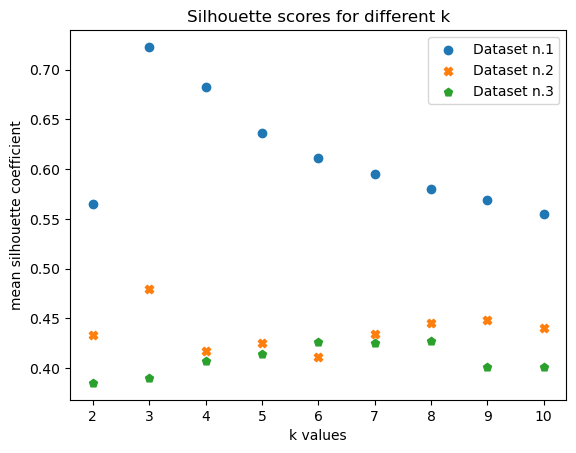

In [35]:
plt.title("Silhouette scores for different k")
plt.xlabel("k values")
plt.ylabel("mean silhouette coefficient")
plt.scatter(np.arange(min_k, max_k + 1), silhouettes1, label="Dataset n.1", marker="o")
plt.scatter(np.arange(min_k, max_k + 1), silhouettes2, label="Dataset n.2", marker="X")
plt.scatter(np.arange(min_k, max_k + 1), silhouettes3, label="Dataset n.3", marker='p')
plt.legend()

### DBSCAN
In the following cell I propose you to run DBSCAN, instead, on one of the last two datasets: either dataset2 or dataset3. 

At the beginning try using a pair of Minpts and Eps of your choice.

**Note:**
If the data is too big, **sample it random, using a factor of 0.1.**

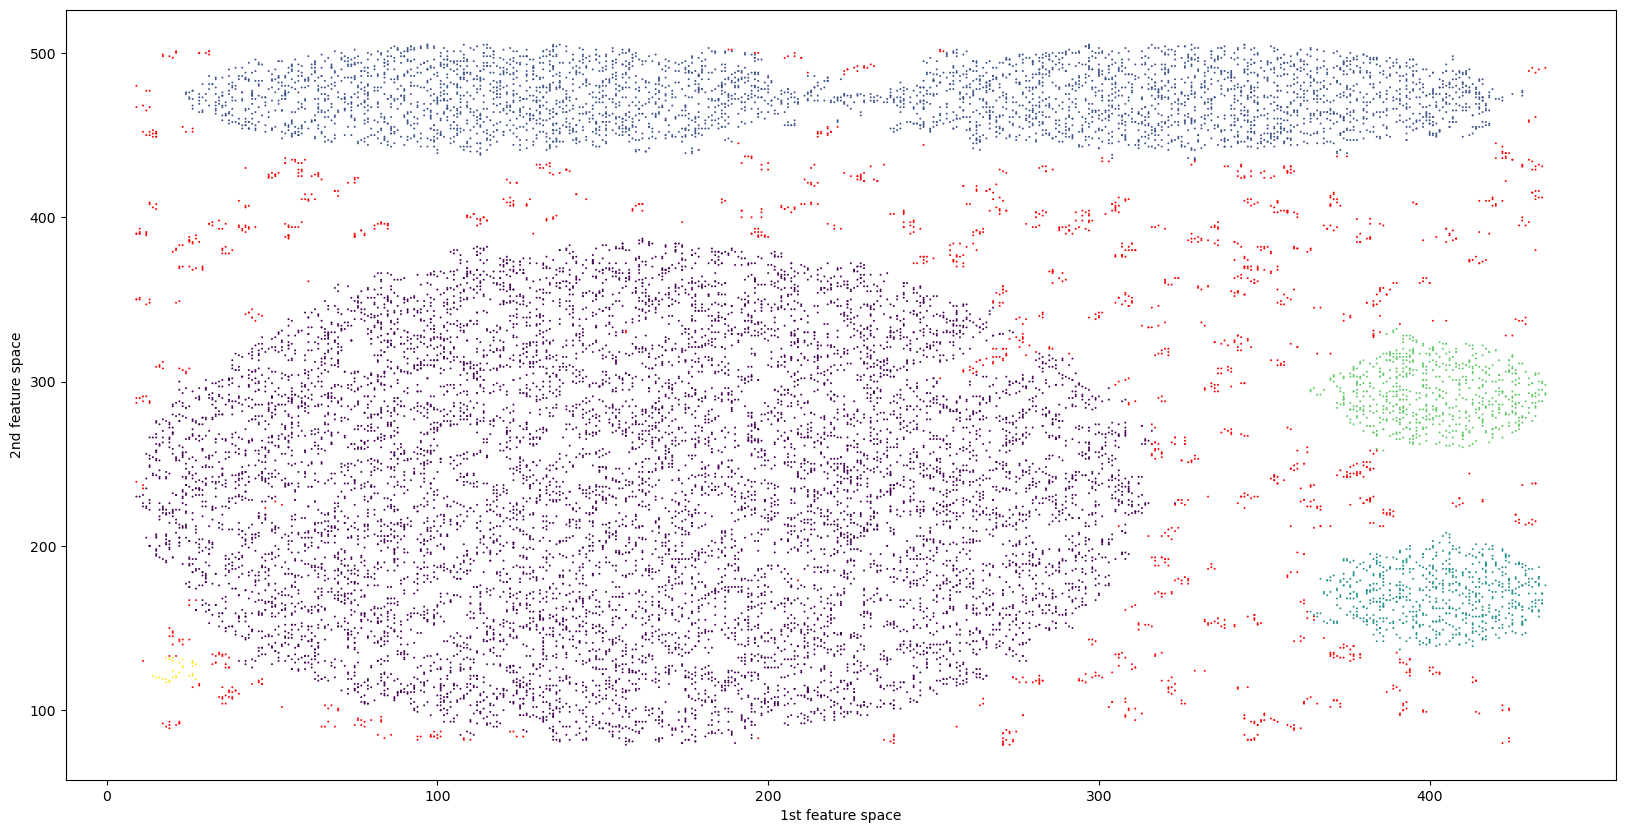

In [36]:
dbscan = DBSCAN(eps=9, min_samples=30).fit(data3_r)

plt.figure(figsize=(20, 10))
plt.xlabel('1st feature space')
plt.ylabel('2nd feature space')
plt.scatter((data3_r[:, 0])[dbscan.labels_ != -1], (data3_r[:, 1])[dbscan.labels_ != -1], 
            c=dbscan.labels_[dbscan.labels_ != -1], edgecolors='none', s=2)
plt.scatter((data3_r[:, 0])[dbscan.labels_ == -1], (data3_r[:, 1])[dbscan.labels_ == -1], c='red', edgecolors='none', s=2)

In the following cell I propose you to: 

1.   Set *Minpts* to a number (say **10**).
2.   Compute the **reachability distance** of the **10-th nearest neighbour ** for each data-point.
3. Sort the set of reachability distances you obtained in an increasing way.
4. Plot the sorted reachability distances
5. Find the **elbow** of the diagram => it gives the eps value combined with Minpts=10.
6. Try this combined pair of parameters on the dataset you chose, with DBSCAN.

In [41]:
minpts = 50
dist = np.sort(squareform(pdist(data3_r)))
minpts_th_dist = np.sort(dist[:, minpts - 1])

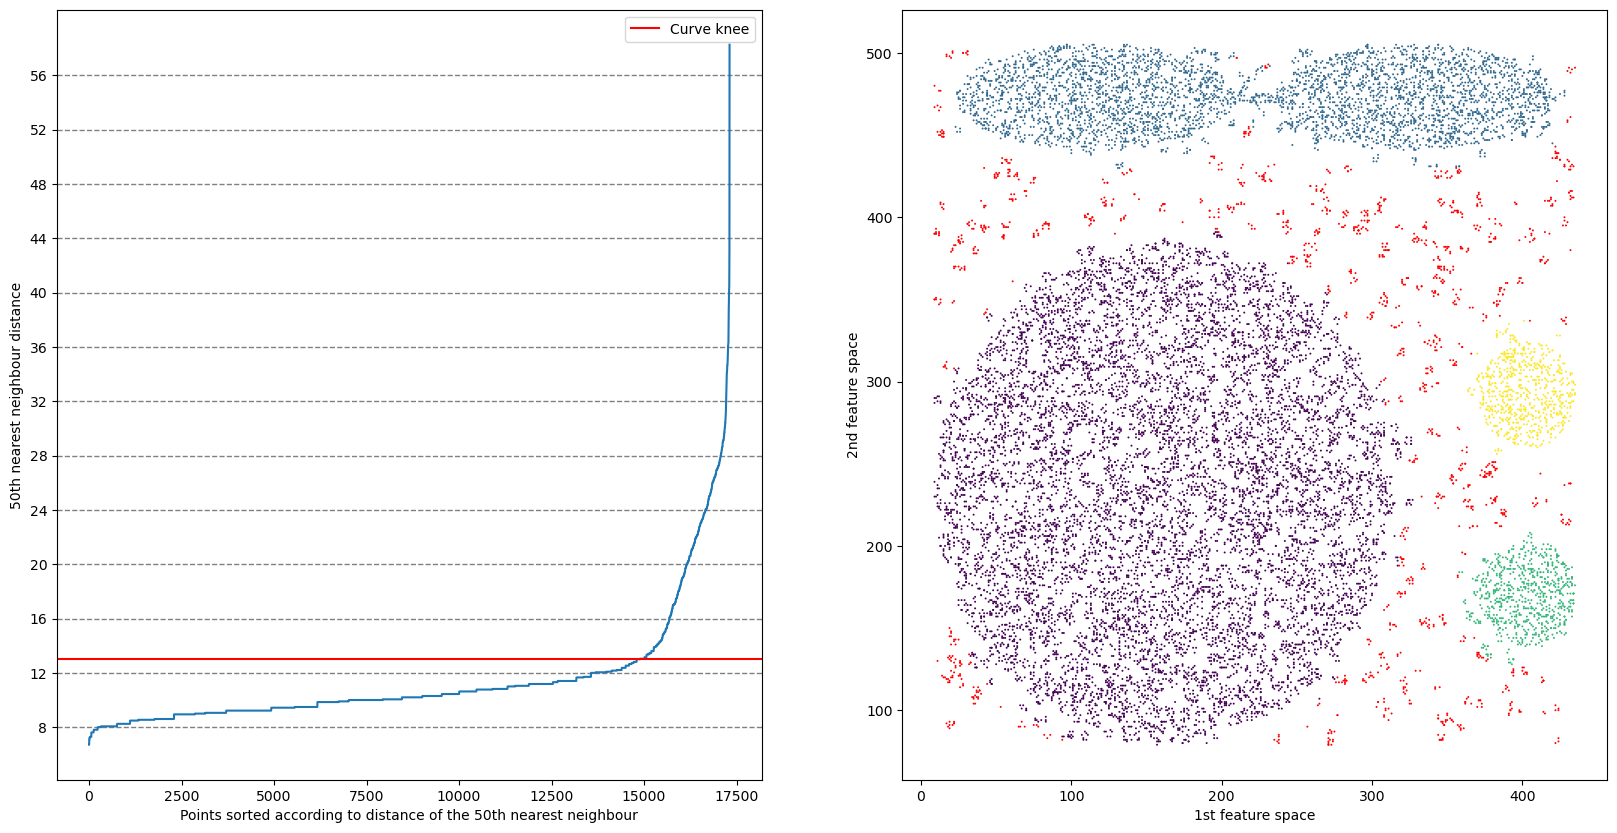

In [42]:
plot_fig, plot_axs = plt.subplots(1, 2, figsize=(20, 10))
plot_axs[0].set(
    xlabel = 'Points sorted according to distance of the %dth nearest neighbour' %minpts,
    ylabel = '%dth nearest neighbour distance' %minpts,
    yticks = np.arange(0, max(minpts_th_dist) + 1, 4))
plot_axs[0].grid(color='grey', linestyle='--', linewidth=1, axis='y')
plot_axs[0].plot(np.arange(0, len(minpts_th_dist)), minpts_th_dist)
plot_axs[0].axhline(y = 13, color='r', label='Curve knee')
plot_axs[0].legend()

dbscan = DBSCAN(eps=13, min_samples=50).fit(data3_r)
plot_axs[1].set(xlabel = '1st feature space', ylabel = '2nd feature space')
plot_axs[1].scatter((data3_r[:, 0])[dbscan.labels_ != -1], (data3_r[:, 1])[dbscan.labels_ != -1], 
                    c=dbscan.labels_[dbscan.labels_ != -1], edgecolors='none', s=2)
plot_axs[1].scatter((data3_r[:, 0])[dbscan.labels_ == -1], (data3_r[:, 1])[dbscan.labels_ == -1], 
                    c='red', edgecolors='none', s=2)